In [1]:
%load_ext autoreload



%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import time

In [2]:
import os
GPU = '0'
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]= GPU

In [3]:
from frm_dataset_creator2 import create_sample_fast
from conf_dataset_1 import *


['ook', 'ask4', 'ask8', 'bpsk', 'qpsk', 'psk8', 'psk16', 'psk32', 'apsk16', 'apsk32', 'apsk64', 'qam16', 'qam32', 'qam64', 'gmsk', 'cpfsk']


In [5]:
from frm_nn_zoo_01 import create_dualPath

pkt_size_net = pkt_size
nn_all = create_dualPath(pkt_size = pkt_size_net,n_mods=len(mod_list))
# nn_all.summary()

/home/samer/miniconda3/envs/mod_framework/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/samer/miniconda3/envs/mod_framework/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/samer/miniconda3/envs/mod_framework/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/samer/miniconda3/en

/home/samer/miniconda3/envs/mod_framework/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/samer/miniconda3/envs/mod_framework/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/samer/miniconda3/envs/mod_framework/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/hom



(?, ?, ?, ?)
(?, 1024, 2)



In [6]:
nn_all.load_weights('models/001.h5')

In [7]:
ref_timing_offset = 0.3
ref_sps = 8
ref_freq = 0.01
ref_mod = 'qpsk'
ref_snr = 2.5
ref_fading = 0.3
max_sps = 64
seed = 3
ref_ebw = 0.35



x =  create_sample_fast( mod = ref_mod,pkt_len = pkt_size,sps=ref_sps,pulse_ebw = ref_ebw,
                  timing_offset = ref_timing_offset,
                  fading_spread = ref_fading, 
                  freq_err = ref_freq, phase_err = np.pi*0.34,    
                  snr = ref_snr, max_sps = max_sps, 
                        complex_fading=True, freq_in_hz = True, 
                  seed = seed)


ref_timing_step = int(max_sps/ref_sps)
ref_timing_offset_num = int(np.round(ref_timing_offset*max_sps))
    
(sig_comb ,sig_carrier,sig_fading,sig_clean,_,raw,coeff) = x

/home/samer/Documents/mod_framework_git/frm_modulations_fast.py:143: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(complex64, 1d, A), array(complex64, 1d, C))
  y[k] = np.dot(pulse_vec,symbs_vec)


In [8]:
y = nn_all.predict(sig_comb[None,:])
y_freq,y_noisy,y_fading,y_clean,y_timing_step,y_timing_off,y_mod  = y



y_timing_off = max(y_timing_off,0)
print('timing_off',ref_timing_offset_num,y_timing_off)
print('Timing Step',ref_timing_step,y_timing_step)
print('freq', (ref_freq),y_freq/(2*np.pi))

ip = y_clean[0]#x[0]
ref = raw

timing_off 19 [[22.32042]]
Timing Step 8 [[7.9192467]]
freq 0.01 [[0.01065986]]


In [9]:
cmp = lambda x : x[:,0] + 1j*x[:,1]
mx = lambda x : x/ np.sqrt(np.mean(np.sum(np.abs(x)**2,-1)))

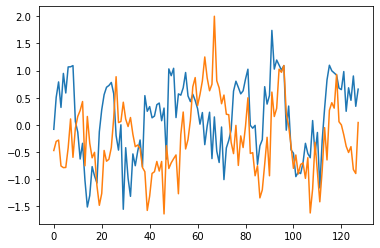

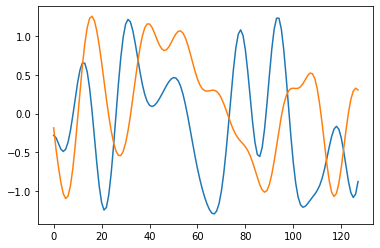

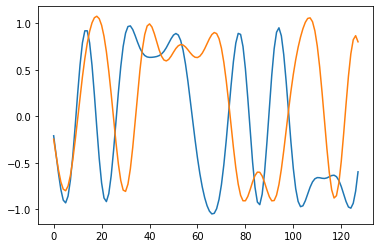

In [10]:

view_slc = slice(0,128)
plt.figure()
plt.plot(sig_comb[view_slc])
# plt.figure()
# plt.plot(sig_carrier[view_slc],'--')
# plt.plot(y_noisy[0,view_slc])

plt.figure()
plt.plot(mx(sig_fading[view_slc]))
# plt.plot(mx(y_fading[0,view_slc]))

plt.figure()
plt.plot(mx(sig_clean[view_slc]))
# plt.plot(mx(y_clean[0,view_slc]))

(-30, 10)

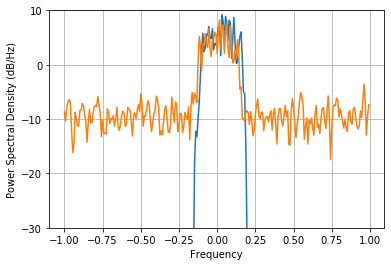

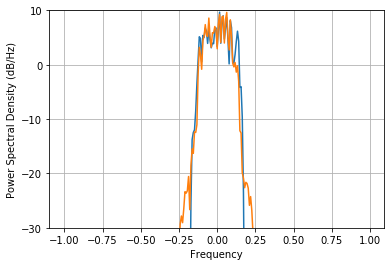

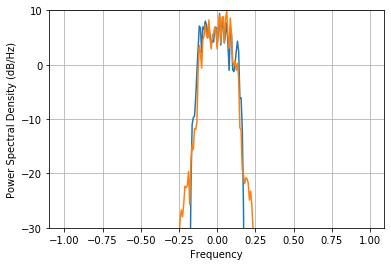

In [11]:
plt.figure()
plt.ylim([-30,10])
plt.psd(cmp(mx(sig_carrier)))
plt.psd(cmp(mx(y_noisy[0])))


plt.figure()
plt.ylim([-30,10])
plt.psd(cmp(mx(sig_fading)))
plt.psd(cmp(mx(y_fading[0])))


plt.figure()
plt.ylim([-30,10])
plt.psd(cmp(mx(sig_clean)))
plt.psd(cmp(mx(y_clean[0])))
plt.ylim([-30,10])

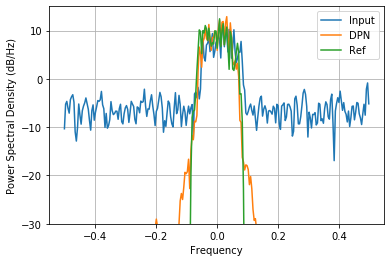

In [12]:
plt.figure()
plt.ylim([-30,15])
plt.psd(cmp(mx(sig_comb)),Fs=1)
plt.psd(cmp(mx(y_clean[0])),Fs=1)
plt.psd(cmp(mx(sig_clean)),Fs=1);
plt.legend(['Input','DPN','Ref'])